In [81]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob2
import matplotlib
import re 

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D,

from sklearn.cross_validation  import train_test_split 
%matplotlib inline  


In [185]:
population_estimate  = pd.read_csv('pop_estimate.csv')

In [292]:
def load_tiles_1d(population_estimate):
    datas =[]
    for tile in population_estimate[' file']:
        data = mpimg.imread(tile)
        datas.append(data)
    return datas, population_estimate[' pop']

def linearize_tile(tile):
    return np.reshape(tile, np.prod(np.shape(tile)))

In [275]:
tiles, pop = load_tiles_1d(population_estimate)

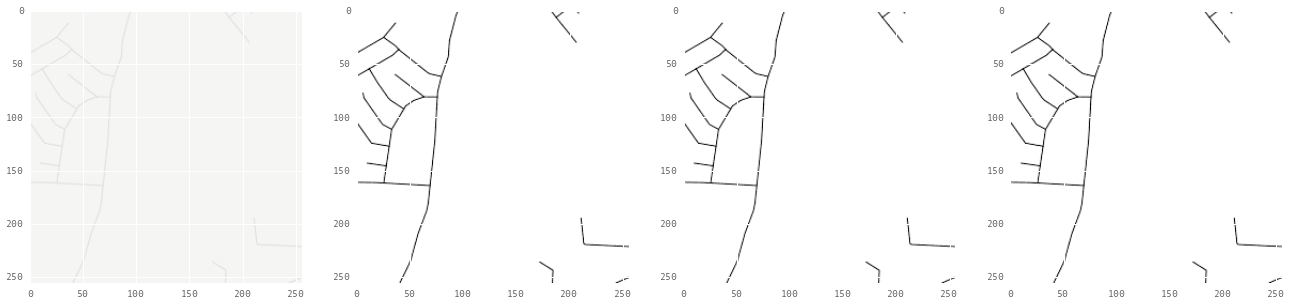

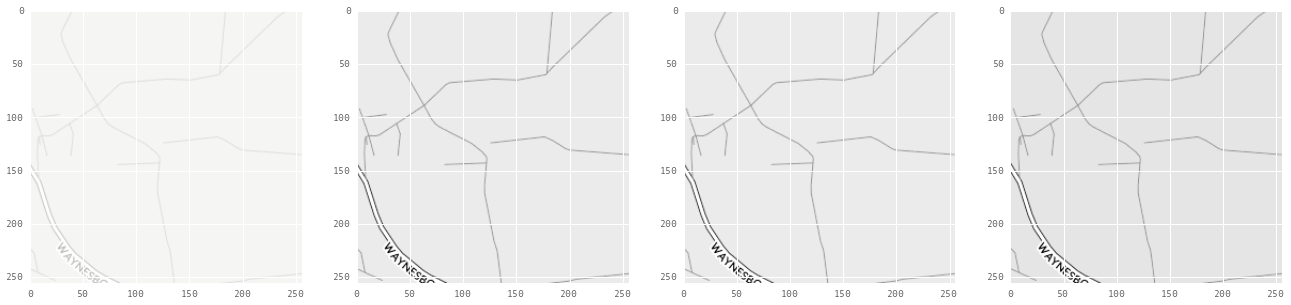

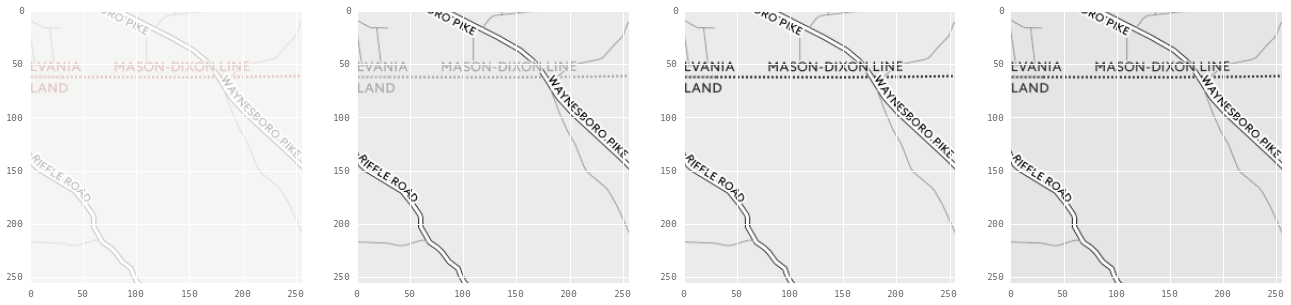

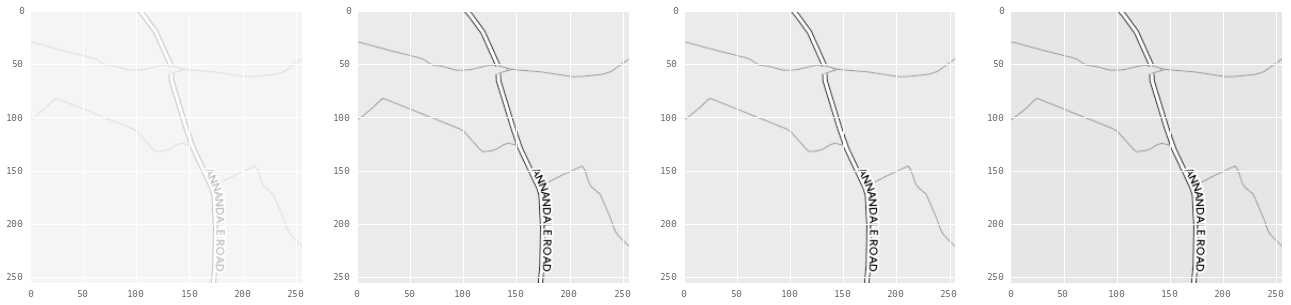

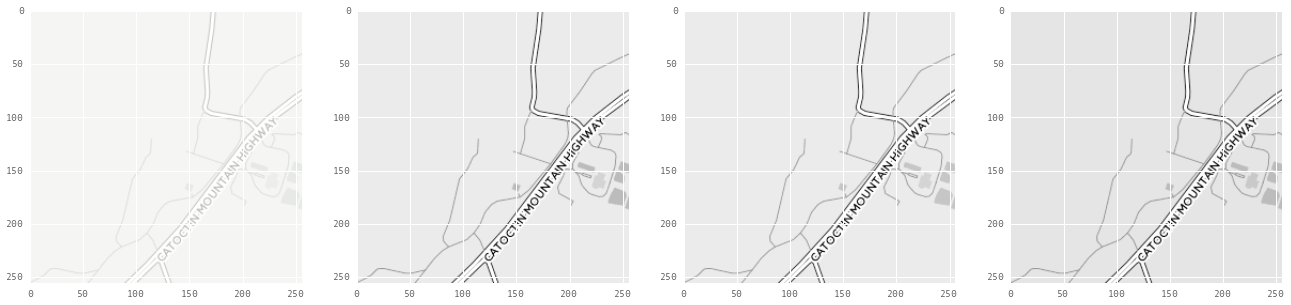

In [277]:
def show_tile(tile):
    fig = plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    plt.imshow(tile)
    plt.subplot(1,4,2)
    plt.imshow(tile[:,:,0], cmap='Greys_r')
    plt.subplot(1,4,3)
    plt.imshow(tile[:,:,1], cmap='Greys_r')
    plt.subplot(1,4,4)
    plt.imshow(tile[:,:,2], cmap='Greys_r')

for tile in tiles[10:15]:
    show_tile(tile)

In [287]:
tiles[15]

array([[[ 0.91764706,  0.91764706,  0.9137255 ],
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        ..., 
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118]],

       [[ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        ..., 
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118]],

       [[ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        ..., 
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118],
        [ 0.96078432,  0.96078432,  0.95294118]],

       ..., 
       [[ 0.89411765,  0.89411765,  0.89019608],
        

In [298]:
l_tiles  = np.array([linearize_tile(tile) for tile in tiles])


In [225]:
def build_model():
    model = Sequential()
    model.add(Dense(output_dim=1000, input_dim=256*256*3))
    model.add(Activation('tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=100))
    model.add(Activation('tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=5))
    model.add(Activation('tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=1))
    model.add(Activation('linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    
    return model

In [299]:
model = build_model()

In [303]:
pop_max  = np.max(pop)
pop_min  = np.min(pop)
scores  = (pop - pop_min)/(pop_max-pop_min)

(array([  3.59700000e+03,   3.18000000e+02,   1.07000000e+02,
          3.70000000e+01,   2.00000000e+01,   8.00000000e+00,
          6.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

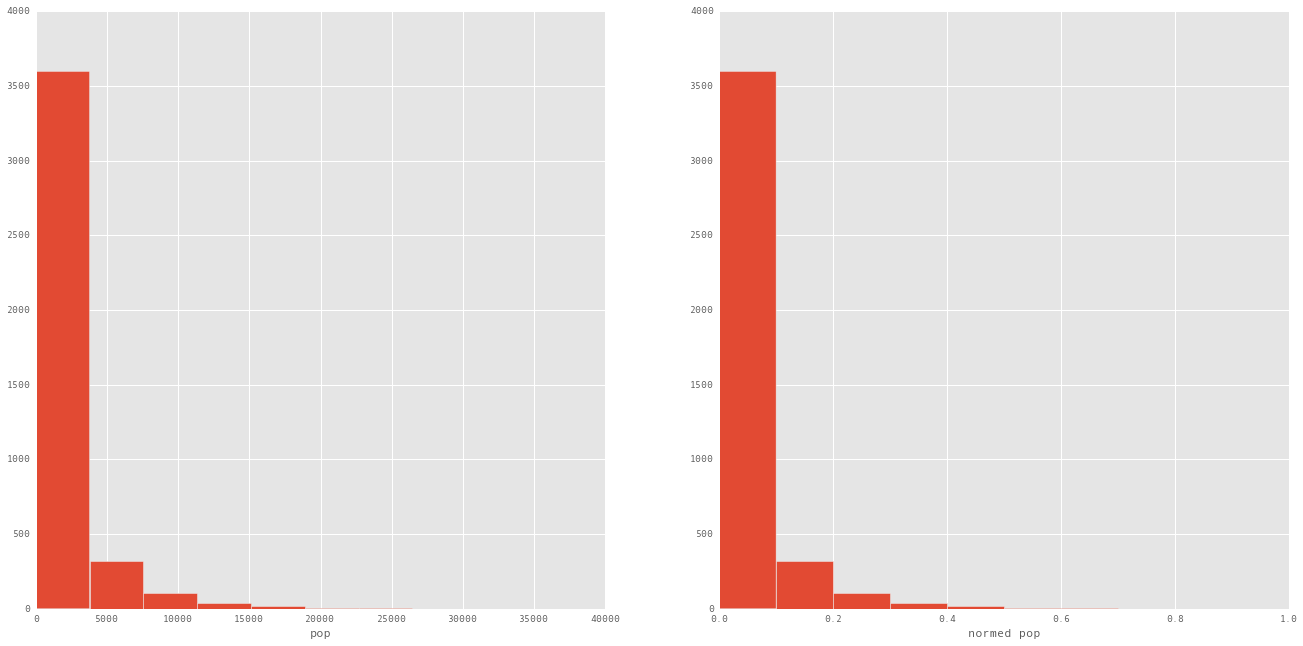

In [302]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xlabel('pop')
plt.hist(pop)
plt.subplot(122)
plt.xlabel('normed pop')
plt.hist(scores)

In [233]:
print np.shape(l_tiles), scores.shape()

(4096, 196608)

TypeError: 'tuple' object is not callable

In [304]:
history = model.fit(l_tiles, scores, show_accuracy=True, validation_split=0.1, nb_epoch=5, batch_size=10000);

Train on 3686 samples, validate on 410 samples
Epoch 1/5
3686/3686 [==============================] - 101s - loss: 1.2896 - acc: 1.0000 - val_loss: 5.1987 - val_acc: 1.0000
Epoch 2/5
3686/3686 [==============================] - 93s - loss: 5.2377 - acc: 1.0000 - val_loss: 2.0152 - val_acc: 1.0000
Epoch 3/5
3686/3686 [==============================] - 64s - loss: 2.1946 - acc: 1.0000 - val_loss: 0.2825 - val_acc: 1.0000
Epoch 4/5
3686/3686 [==============================] - 67s - loss: 0.5780 - acc: 1.0000 - val_loss: 0.2208 - val_acc: 1.0000
Epoch 5/5
3686/3686 [==============================] - 64s - loss: 0.5147 - acc: 1.0000 - val_loss: 0.1719 - val_acc: 1.0000


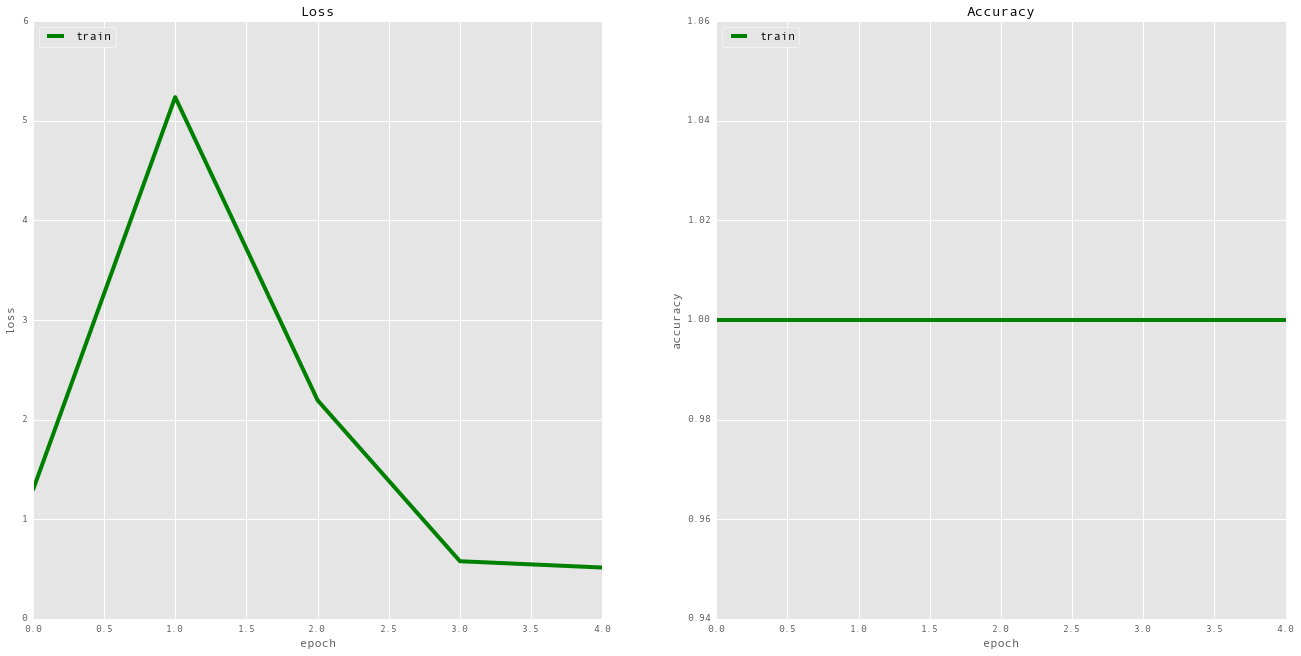

In [305]:
plt.style.use('ggplot')
def plot_model_perfromance(history):
    fig   = plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    
    train = plt.plot(history.epoch, history.history['loss'], 'g-', label='train')
#     val   = plt.plot(history.epoch, history.history['val_loss'], 'r-', label='validation')
    plt.legend( loc='upper left' )
    plt.subplot(122)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(history.epoch, history.history['acc'], 'g-', label='train')
#     plt.plot(history.epoch, history.history['val_acc'], 'r-',label='validation')
    plt.legend( loc='upper left' )


plot_model_perfromance(history)

In [312]:
plt.scatter(zip(model.predict(l_tiles[0:50]), scores[0:50]))

TypeError: scatter() takes at least 2 arguments (1 given)

In [235]:
np.shape(tiles)

(4096, 256, 256, 3)

## Convolutional

In [ ]:
def build_model():
    model = Sequential()